In [1]:
import numpy as np 
import cmath 

from qiskit import QuantumCircuit, transpile
from qiskit import Aer, execute
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

from project_qsiris.conversion_qo_qiskit import load_oddysey_puzzle, odyssey_to_qiskit,  add_odyssey_moment, get_odyssey_nr_qubits

In [2]:
#IBMQ.load_account()

## Examples :

### Circuits from QK_QO converrted again in Qiskit

In [3]:
#Step 1: read the puzzle is like a python dictionary 

path = "circuits/qiskit_to_odyssey/example_002.qpf"
puzzle =  load_oddysey_puzzle(path)

{'PuzzleDefinition': {'ModuleID': 'Qiskit', 'ID': 57, 'QubitCapacity': 4, 'GateCapacity': 7, 'Name': 'circuit-1', 'InitialState': [[{'Real': 1, 'Imaginary': 0, 'Magnitude': 1, 'Phase': 0.0}], [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}], [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}], [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}], [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}], [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}], [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}], [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}], [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}], [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}], [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}], [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}], [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}], [{'Real': 0, 'Imaginary': 0, 'Magnitude': 0, 'Phase': 0.0}], [{'Real': 0, 'I

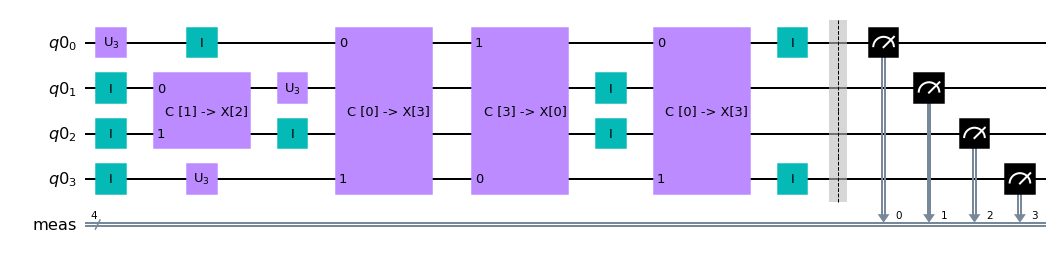

In [4]:
#Step 2: convert your puzzle to a Qiskit circuit 

qc = odyssey_to_qiskit(puzzle, incl_initial_state=False)  
qc.measure_all()
qc.draw('mpl')

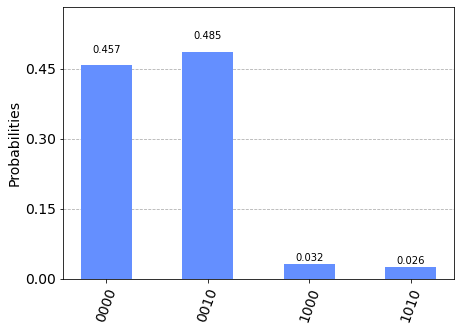

In [5]:
#Step 3: Runn your puzzle on a qiskit simulator 

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend,shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Now let's runn the circuit on a real device:

In [6]:
#Step 4: Run your puzzle on a real QPU from IBM

provider = IBMQ.get_provider('ibm-q')
ibm_QPU=provider.get_backend('ibmq_santiago')

job=execute(qc, backend=ibm_QPU, shots=100)
job_monitor(job,interval=10) 

IBMQProviderError: 'No provider matches the specified criteria: hub = ibm-q, group = None, project = None'

In [ ]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### another example:

In [ ]:
path = "circuits/odyssey_circuits/asdasd.qpf"

In [ ]:
res = read_circuit(path)
res.keys()

In [ ]:
ody_qubits = odyssey_get_nr_q(res)
qc = QuantumCircuit(ody_qubits, ody_qubits)

add_gates(res, qc, barrier=True)

qc.draw('mpl')

In [ ]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()
print(result.get_unitary(qc, decimals=3))

In [ ]:
backend = Aer.get_backend('qasm_simulator')
result = transpile(qc, backend=backend, optimization_level=3)
result.draw(output='mpl')

In [ ]:
# It is important to have as many decimals as possible 
# Otherwise we can get unitary erros (even if we can introduce the gate in the circuit) .

unit=[[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
      [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
      [ 0.+0.j,  0.+0.j,  0.70710679+0.j,  0.70710679+0.j],#np.sqrt(1/2)+0.j,  np.sqrt(1/2)+0.j],
      [ 0.+0.j,  0.+0.j,  0.70710679+0.j, -0.70710679+0.j],]#np.sqrt(1/2)+0.j,  -np.sqrt(1/2)+0.j],]#0.70710679+0.j, -0.70710679+0.j],]


qc=QuantumCircuit(2)
qc.unitary(unit,[0,1])
qc.draw()

In [ ]:
print(qc.qasm())